Import libraries

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import tensorflow.compat.v1 as tf
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Try the path

In [4]:
patht = "fruits360DS\\Training"
print(os.listdir(patht))

['Apple Braeburn', 'Banana', 'Cactus fruit', 'Dates', 'Eggplant']


Read in one of the images, using cv2. Note: cv2 reads images as Blue Green Red

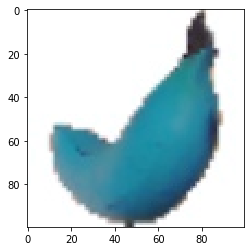

In [6]:
pathImg = "fruits360DS\\Training\\Banana\\7_100.jpg"
img1 = cv2.imread(pathImg)
plt.imshow(img1)

the form Red Green Blue

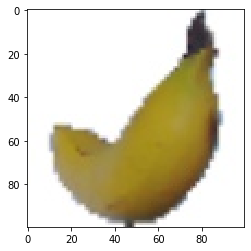

In [7]:
b,g,r = cv2.split(img1)
img2 = cv2.merge([r,g,b])
plt.imshow(img2)

The image is 100x100X3 pixels

In [8]:
img2.shape

(100, 100, 3)

normalise the pixel values (values will be between 0 and 1)

In [9]:
img2 = img2.astype('float')/255
img2

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

Flatten the 100x100x3 array into a single series

In [10]:
img2 = img2.flatten()
img2 = pd.Series(img2)
img2

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
29995    1.0
29996    1.0
29997    1.0
29998    1.0
29999    1.0
Length: 30000, dtype: float64

Prepare all training images

In [11]:
path = "fruits360DS\\Training\\"

cols = np.arange(img2.shape[0])
df = pd.DataFrame(columns = cols)
labelcol = []

fruitlist = os.listdir(path)
x = 0

for f in fruitlist : 
    fruitpath = '%s%s' % (path,f)
    
    imgList = os.listdir(fruitpath)
    
    for i in imgList:
        imgPath = '%s/%s' % (fruitpath,i)
    
        img = cv2.imread(imgPath)
    
        b,g,r = cv2.split(img)
        img = cv2.merge([r,g,b])
    
        #imgGray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
        img = img.astype('float')/255
    
        img = img.flatten()
    
        df.loc[x] = img
    
        x = df.shape[0] + 1
        labelcol.append(f)


df['label'] = labelcol
df

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,0.996078,1.0,1.000000,0.996078,1.000000,1.000000,0.996078,1.000000,1.000000,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Apple Braeburn
2,0.996078,1.0,0.984314,1.000000,1.000000,0.984314,1.000000,0.992157,0.996078,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Apple Braeburn
3,0.992157,1.0,0.980392,1.000000,1.000000,0.984314,1.000000,0.996078,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Apple Braeburn
4,1.000000,1.0,0.984314,1.000000,1.000000,0.984314,1.000000,0.992157,0.996078,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Apple Braeburn
5,1.000000,1.0,0.980392,1.000000,0.996078,0.976471,1.000000,0.992157,0.988235,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Apple Braeburn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Eggplant
2427,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Eggplant
2428,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Eggplant
2429,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Eggplant


Shuffle the dataset(rows)

In [13]:
df = shuffle(df).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Eggplant
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Banana
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Eggplant
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Dates
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Eggplant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cactus fruit
2426,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Eggplant
2427,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Dates
2428,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cactus fruit


Create x_train and y_train variables

In [15]:
x_train = df.drop('label',axis = 1)
y_train = df['label']

Prepare all testing images

In [16]:
path = "fruits360DS\\Test\\"

cols = np.arange(img2.shape[0])
df2 = pd.DataFrame(columns = cols)
labelcol = []

fruitlist = os.listdir(path)
x = 0

for f in fruitlist : 
    fruitpath = '%s%s' % (path,f)
    
    imgList = os.listdir(fruitpath)
    
    for i in imgList:
        imgPath = '%s/%s' % (fruitpath,i)
    
        img = cv2.imread(imgPath)
    
        b,g,r = cv2.split(img)
        img = cv2.merge([r,g,b])
    
        #imgGray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
        img = img.astype('float')/255
    
        img = img.flatten()
    
        df2.loc[x] = img
    
        x = df2.shape[0] + 1
        labelcol.append(f)
        
df2['label'] = labelcol

Shuffle the dataset(rows)

In [17]:
df2 = shuffle(df2).reset_index(drop = True)
df2

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Dates
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Eggplant
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cactus fruit
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cactus fruit
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Banana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Dates
814,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cactus fruit
815,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cactus fruit
816,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Eggplant


Create x_test and y_test variables

In [18]:
x_test = df2.drop('label',axis = 1)
y_test = df2['label']

Convert categorical data to numericdata

In [19]:
#y_train
labelencoder = LabelEncoder()
y_train=labelencoder.fit_transform(y_train)

y_train = y_train.reshape(-1,1)
onehotencoder = OneHotEncoder(categorical_features=[0])
y_train = onehotencoder.fit_transform(y_train).toarray()

#y_test
labelencoder = LabelEncoder()
y_test=labelencoder.fit_transform(y_test)

y_test = y_test.reshape(-1,1)
onehotencoder = OneHotEncoder(categorical_features=[0])
y_test = onehotencoder.fit_transform(y_test).toarray()

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer dat

In [20]:
x_train.shape[0]

2430

Hyperparameters

In [64]:
learning_rate = 0.01
epochs = 40
batchSize = 140
batches = int(x_train.shape[0] / batchSize)
batches

17

x_train.shape[0] = 2430 -> number of baches = 17 batch

Placeholders

In [22]:
tf.disable_v2_behavior()  
X = tf.placeholder(tf.float32, [None, 100*100*3])
Y = tf.placeholder(tf.float32, [None, 5])

Instructions for updating:
non-resource variables are not supported in the long term


weights and bias

In [23]:
w = tf.Variable(tf.truncated_normal([100*100*3, 5]))
b = tf.Variable(tf.zeros(5))

pred is the predicted scores of each class

In [33]:
pred = tf.matmul(X, w) + b

Declare loss function

In [26]:
alpha = tf.constant([0.01])
delta = tf.constant([1.0], tf.float32)

alpha * tf.reduce_sum(tf.reduce_sum(tf.square(W), axis=1))

In [27]:
regulation_term = alpha * tf.nn.l2_loss(w)

Margin term in loss 
..S_truelabel is the score of the correct class (y sub i)in the equation

In [28]:
S_truelabel = tf.reduce_sum(tf.multiply(Y,pred),axis=1 ,keepdims=True)
loss = tf.reduce_mean(tf.reduce_sum(tf.maximum(0.0, pred - S_truelabel + delta), 1) - delta )
loss += regulation_term

the optimizer for optimizing the loss function

In [29]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Accuracy Function

In [30]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])

Train the model

In [65]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())

    for epoch in range(epochs):
        for i in range(batches):
            offset = i * epoch
            x = x_train[offset: offset + batchSize]
            y = y_train[offset: offset + batchSize]
            sesh.run(optimizer, feed_dict={X: x, Y:y})
            c = sesh.run(loss, feed_dict={X:x, Y:y})
        #print model accuracy per after each 3 epoch
        if epoch % 1 == 0 :
            acc = accuracy(sesh.run(pred,feed_dict={X:x, Y:y}), y)
            print(f'epoch:{epoch} loss={c} Acc={acc}')
    print('Test Accuracy = ', accuracy(sesh.run(pred,feed_dict={X: x_test, Y:y_test}),y_test))
    predictionValues = sesh.run(pred,feed_dict={X:x_test})

epoch:0 loss=[614.38354] Acc=43.57142857142857
epoch:1 loss=[581.26483] Acc=78.57142857142857
epoch:2 loss=[578.3541] Acc=79.28571428571429
epoch:3 loss=[575.013] Acc=84.28571428571429
epoch:4 loss=[571.98334] Acc=85.71428571428571
epoch:5 loss=[570.4308] Acc=82.14285714285714
epoch:6 loss=[567.8296] Acc=82.14285714285714
epoch:7 loss=[565.20715] Acc=87.85714285714286
epoch:8 loss=[563.61554] Acc=88.57142857142857
epoch:9 loss=[562.234] Acc=89.28571428571429
epoch:10 loss=[560.19604] Acc=90.0
epoch:11 loss=[558.17126] Acc=90.0
epoch:12 loss=[556.28613] Acc=89.28571428571429
epoch:13 loss=[554.09503] Acc=90.71428571428571
epoch:14 loss=[551.8733] Acc=93.57142857142857
epoch:15 loss=[550.1309] Acc=92.14285714285714
epoch:16 loss=[547.93896] Acc=93.57142857142857
epoch:17 loss=[546.39404] Acc=92.85714285714286
epoch:18 loss=[543.9913] Acc=93.57142857142857
epoch:19 loss=[542.1004] Acc=93.57142857142857
epoch:20 loss=[540.13513] Acc=95.0
epoch:21 loss=[538.156] Acc=97.85714285714286
epoch:

confusion matrix

In [66]:
actualVallues=np.argmax(y_test,1)
predictedValues=np.argmax(predictionValues,1)
cm=metrics.confusion_matrix(actualVallues,predictedValues)
print(cm)

[[142   0  22   0   0]
 [  0 140   3  23   0]
 [  0   0 120  26  20]
 [  0   0   0 166   0]
 [  1   0   0  15 140]]
